<a href="https://colab.research.google.com/github/glenmiracle18/Glen-s-repo/blob/main/Real_life_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [89]:
df = pd.read_csv(
    '/content/btc-eth-prices-outliers.csv',
    index_col=0, #getting rid of the index number values
    parse_dates=True  #parsing the date_time objects
)
#parsing means analysing string (text) into logical values

In [90]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bitcoin  365 non-null    float64
 1   Ether    362 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [12]:
df.dtypes

Bitcoin    float64
Ether      float64
dtype: object

In [13]:
df.dtypes.index

Index(['Bitcoin', 'Ether'], dtype='object')

In [15]:
df.shape

(365, 2)

<Figure size 1152x648 with 0 Axes>

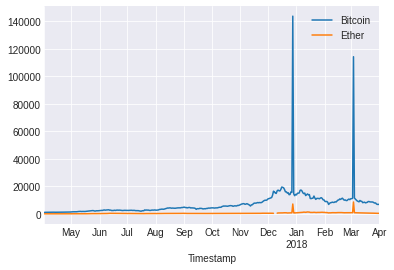

In [26]:
#or you can still say
plt.figure(figsize=(16, 9))
df.plot()

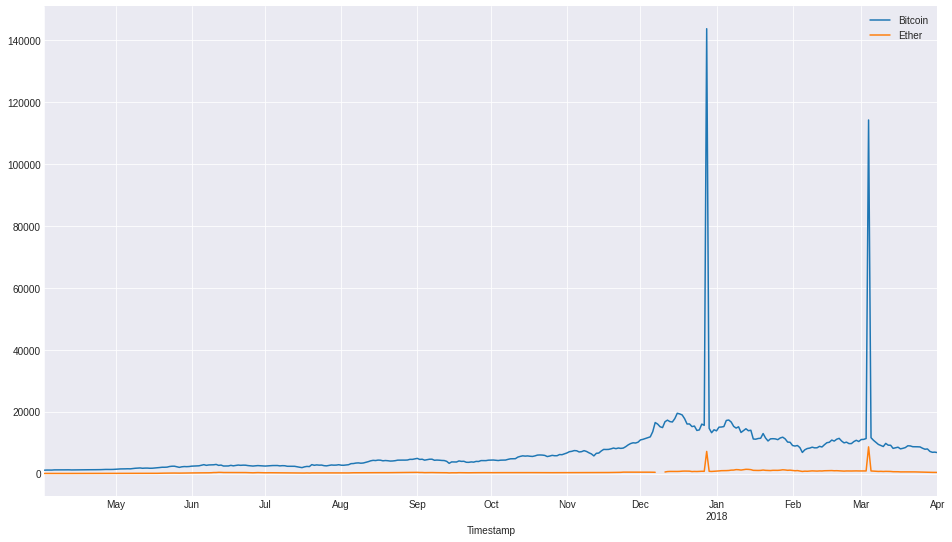

In [27]:
#now let us run a simple visualization
df.plot(figsize=(16, 9))

In [20]:
#we can notice ther is some missing data. 
#Now it's time for us to clean the data

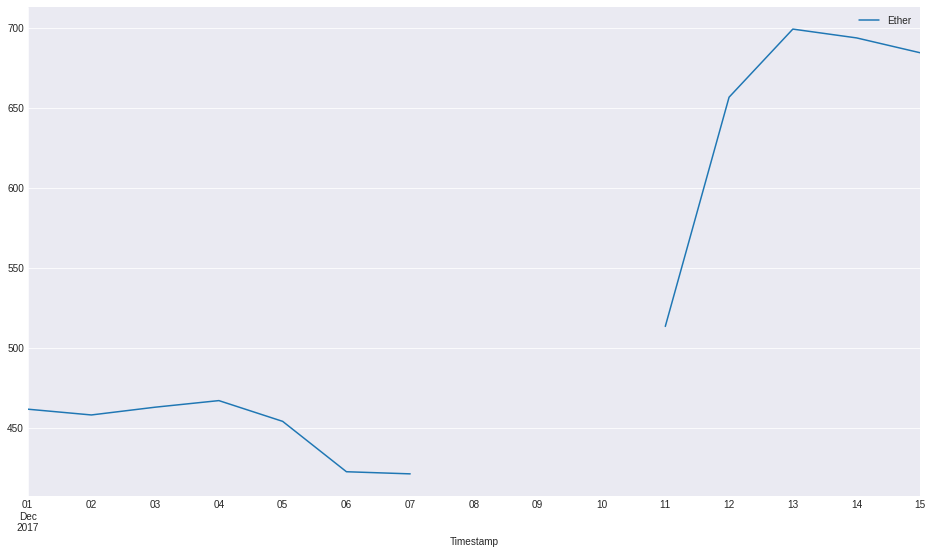

In [28]:
#There seem to be some data missing in the Ether plot,
#between Dec 2017 and Jan 2018
#let's to zoom to see what is going on
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [29]:
#so we see that between Dec 07 and Dec 11 of 2017,
#We have inconsisten data.
#How do we solve this. Let's take a look.

In [31]:
df_na = df.loc['2017-12-02': '2017-12-15']
#this is the range where I will check for the inconsistencies

In [32]:
df_na

,Bitcoin,Ether
Timestamp,,
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [33]:
df_na['Ether'].isna().values.any()
#it is confirmed that we have Nan's

True

In [34]:
#let's get the exact instances where we have Nan's
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [38]:
#let me view it with a litle bit of more context of the its environmen
df.loc['2017-12-06': '2017-12-13']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09


In [39]:
#Now we can decide to 
#drop
#backfill
#forwardfill

In [40]:
df.loc['2017-12-06': '2017-12-13'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09


In [41]:
#Now take a look to see the changes
#Lets just apply the method to the whole dataframe
df.fillna(method='bfill', inplace=True)

The inplace parameter in Pandas is a boolean parameter that is used to determine whether to modify the original DataFrame in place or to create a new DataFrame with the modifications.

When inplace=True, the fillna method modifies the original DataFrame in place by replacing the missing values with the values from the next non-missing element (i.e., using backfill). In other words, the missing values are replaced with the value of the first non-missing element that comes after the missing element.

When inplace=False (which is the default), the fillna method returns a new DataFrame with the missing values filled in, without modifying the original DataFrame. This means that if you want to use the modified DataFrame, you will need to assign the result of the fillna method back to the original DataFrame or to a new variable.

In summary, setting inplace=True means that the original DataFrame will be modified in place, whereas setting inplace=False (or omitting it) means that a new DataFrame will be returned with the modifications.

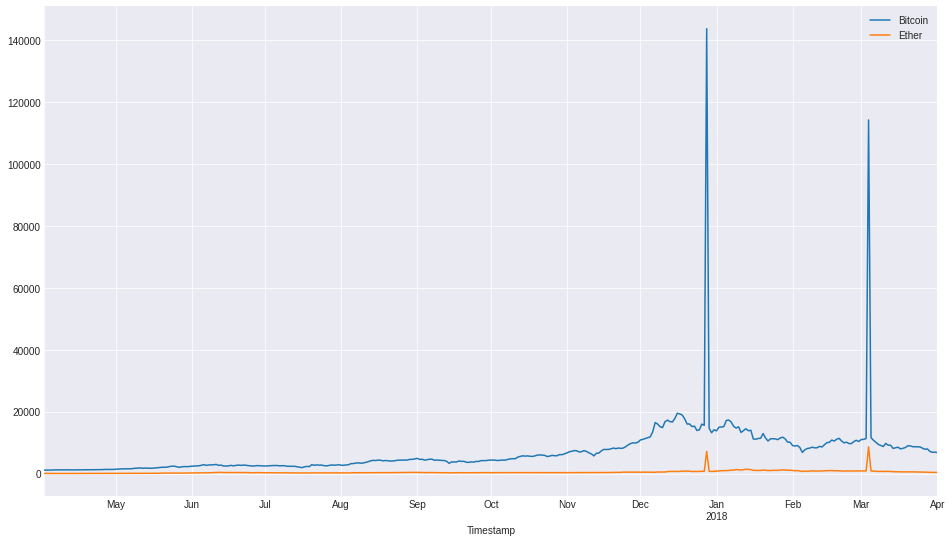

In [42]:
df.plot(figsize=(16, 9))

In [43]:
#We have sucessfully solved our first problem.

In [44]:
#Now we want to seen how we can fix the huge spikes.
#We first see these huge spikes located in the last 10 days of Dec 2017
#and the first of March 2018

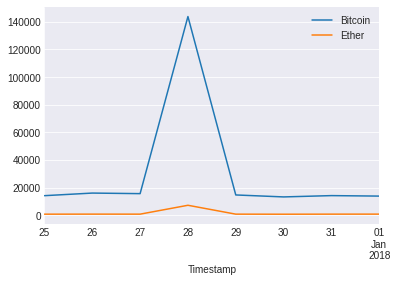

In [46]:
#let me zoom in for a while
df.loc['2017-12-25': '2018-01-01'].plot()

In [47]:
#lets observe what is happening in the dataframe
df.loc['2017-12-25': '2018-01-01']

,Bitcoin,Ether
Timestamp,,
2017-12-25,14119.028333,723.14
2017-12-26,15999.048333,753.40
2017-12-27,15589.321667,739.94
2017-12-28,143805.816667,7166.90
2017-12-29,14640.140000,739.60
2017-12-30,13215.574000,692.99
2017-12-31,14165.575000,741.13
2018-01-01,13812.186667,756.20


In [54]:
#lets check for the spike in March 2018
df.loc['2018-03-01': '2018-03-09']

,Bitcoin,Ether
Timestamp,,
2018-03-01,11009.381667,869.87
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-04,114301.816667,8648.30
2018-03-05,11595.540000,849.42
2018-03-06,10763.198333,815.69
2018-03-07,10118.058000,751.13
2018-03-08,9429.111667,698.83
2018-03-09,9089.278333,726.92


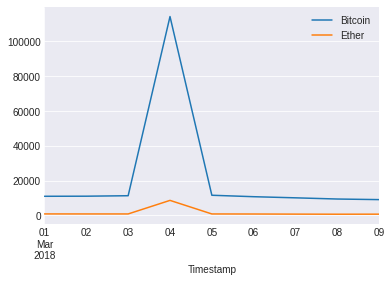

In [55]:
#We see the spikes too.
#now lets visualize it
df.loc['2018-03-01': '2018-03-09'].plot()

In [48]:
#from this observation, we can notice that the decimal point
#has shifted drastically. this can be caused by an error during
#data entry as it is mostly the case.
#How do we now fix this?

In [49]:
#The only way to fix this is to set the maximum decimal place of Ether
#to be at most 3df and that of Bitcoin to be at maximun 5dp

In [ ]:
#so the exact dates of the spikes are:
#2018-03-04 for March 2018
#2017-12-28 for Dec 2017

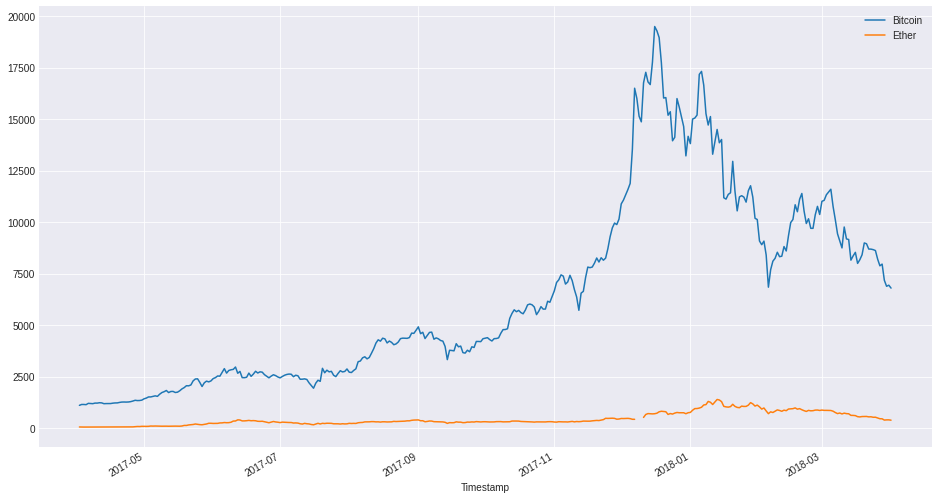

In [103]:
#To avoid some more issues, we will just drop those spikin days
df_cleaned = df.drop(pd.to_datetime(['2018-03-04', '2017-12-28']))
df_cleaned.plot(figsize=(16, 9))

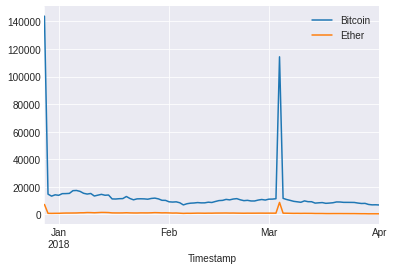

In [102]:
#Now we have gotten rid of all the extra spikes as compared
#to how it was at first
df.loc['2017-12-28': '2018-04-03'].plot()

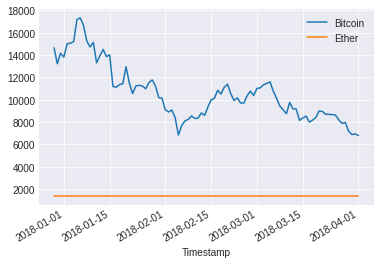

In [101]:
df_cleaned.loc['2017-12-28': '2018-04-03'].plot()

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

In [65]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [66]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [68]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [69]:
#Now we can use a few of the chart that we saw before + seaborn to
#visualize the distribution of our values. In particular, we're
#interested in histograms.

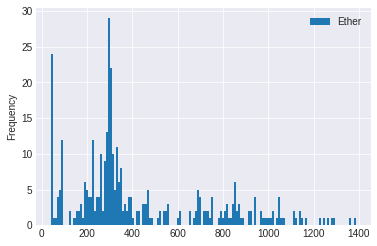

In [104]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

In [94]:
#this is know the maximun ether value and know how many times it appeared
max_ether = df_cleaned['Ether'].max()
count_max_ether = df_cleaned['Ether'].value_counts()[max_ether]
print(count_max_ether)
#we see it appeared only one time.

363


In [99]:
max_date = df.loc[df['Ether'] == max_ether].index[0]
max_date

Timestamp('2018-01-13 00:00:00')

In [95]:
df_cleaned.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,1385.02
2017-04-03,1141.813000,1385.02
2017-04-04,1141.600363,1385.02
2017-04-05,1133.079314,1385.02
2017-04-06,1196.307937,1385.02


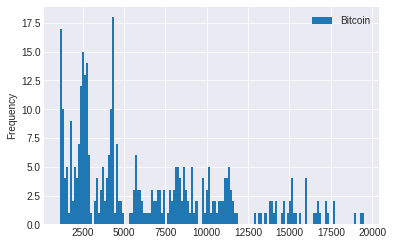

In [105]:
#let me check out for bitcoin
df_cleaned.plot(kind='hist', bins=150, y='Bitcoin')

In [106]:
#Now using Seaborn

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


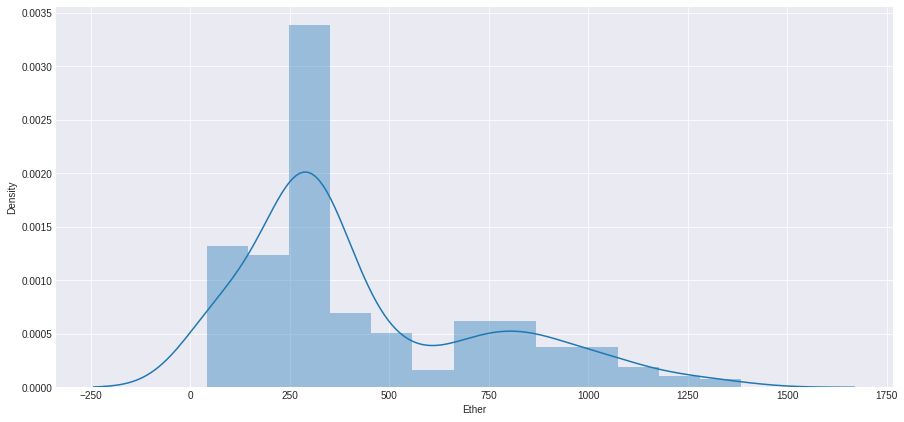

In [108]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

sns.distplot(df_cleaned['Ether'], ax=ax): This line uses the distplot() function from the seaborn library to plot the distribution of the 'Ether' variable in the 'df_cleaned' DataFrame on the axis object ax. The resulting plot will be a histogram or density plot, depending on the arguments used in distplot(). By default, distplot() will show both a histogram and a kernel density estimate.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


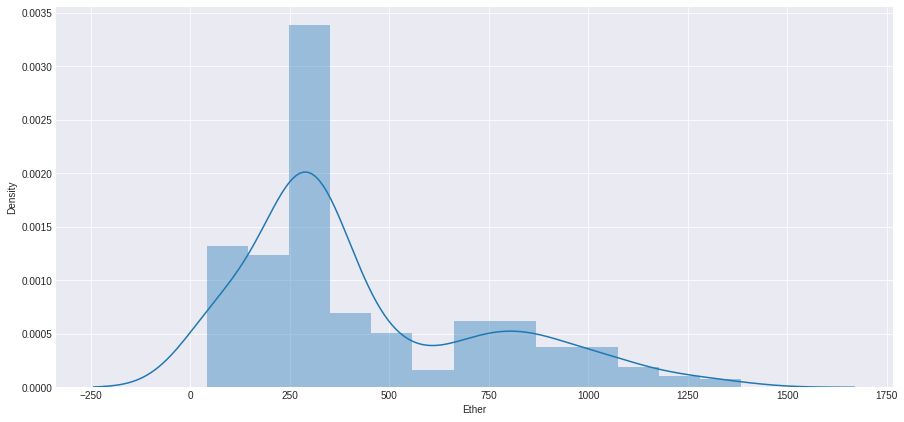

In [109]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


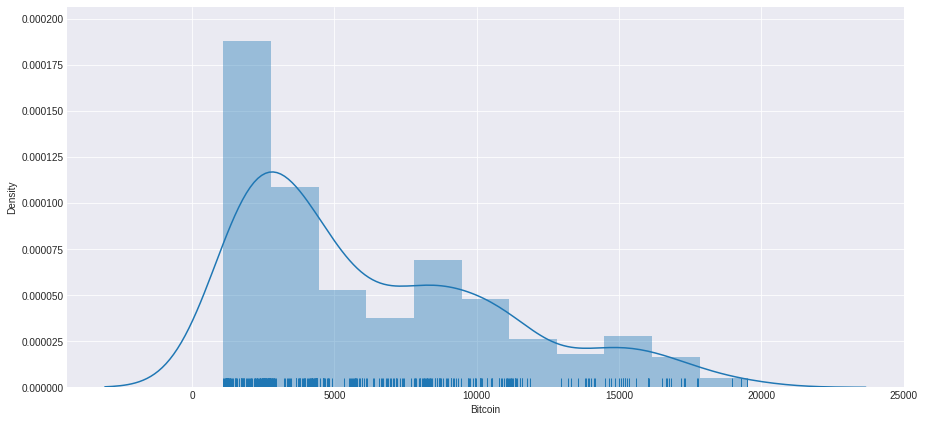

In [111]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

#The rug is used to understand the denisty of the value of the 
#Bitcoin variable.


A rug plot is a plot of data points drawn as vertical tick marks along the x-axis of a histogram or density plot. Each tick mark represents an individual data point in the distribution, and the density of tick marks provides a visual representation of the distribution of the data.

By default, rug=False, and the rug plot is not added to the plot. When rug=True, a rug plot is added to the plot, and it can be useful to get a sense of the density of the data points.

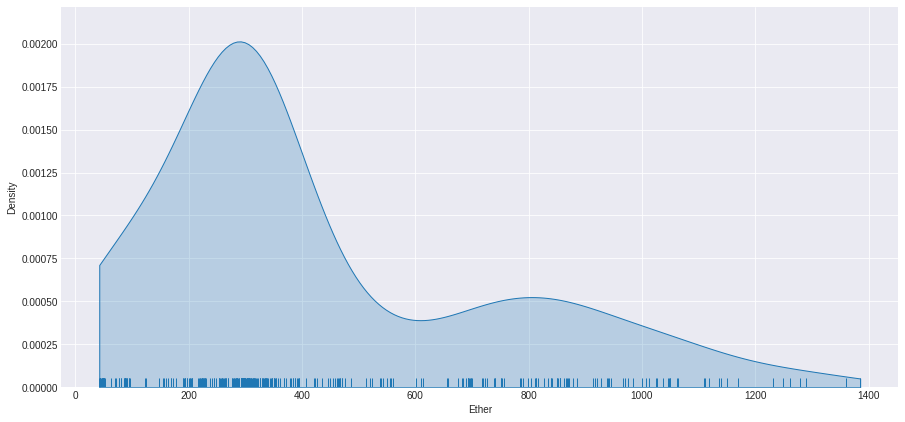

In [114]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


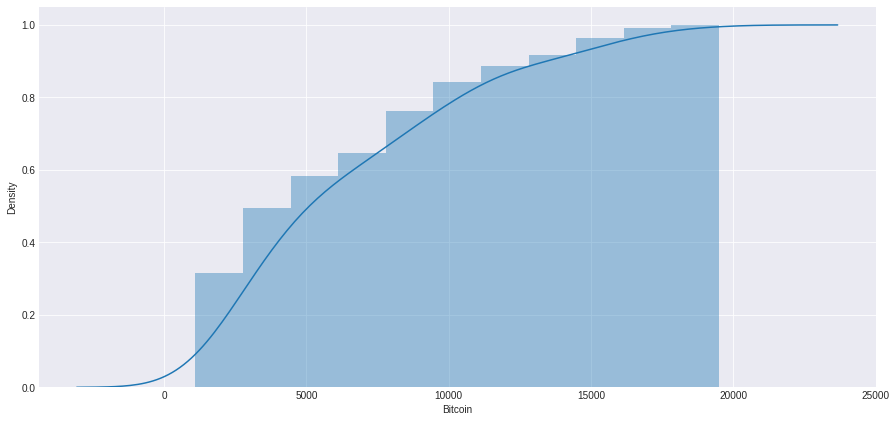

In [117]:
#We can also visualize a cumultative plot of our distrubution
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In the code sns.distplot(df_cleaned['Bitcoin'], ax=ax, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True)), the hist_kws and kde_kws parameters in the distplot() function call are used to pass keyword arguments to the histogram and kernel density estimation (KDE) components of the plot, respectively.

The keyword argument cumulative=True is being passed to both the histogram (hist_kws=dict(cumulative=True)) and the KDE (kde_kws=dict(cumulative=True)) of the distribution plot. This indicates that the plot should display the cumulative distribution function (CDF) rather than the probability density function (PDF).

The CDF is a function that describes the cumulative distribution of a random variable, or in other words, the probability that a value of the variable will be less than or equal to a certain value. The CDF starts at 0 and increases to 1 as the value of the variable increases. It provides a useful way to understand the distribution of the data and can be especially helpful when comparing multiple distributions.

By default, the distplot() function shows the PDF of the distribution, which represents the relative frequency of values in the distribution. However, by setting cumulative=True for both the histogram and KDE components of the plot, the resulting plot will show the CDF of the 'Bitcoin' variable from the df_cleaned DataFrame, which is created using seaborn's distplot() function.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


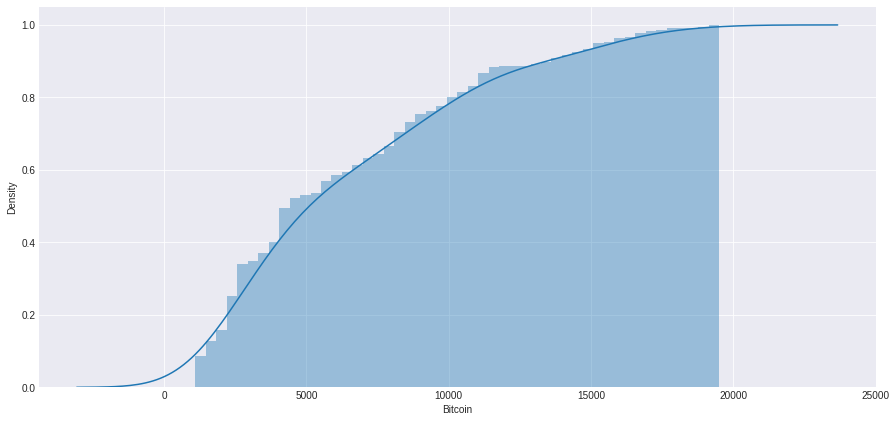

In [119]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

Visualizing Birative Distrubutions

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


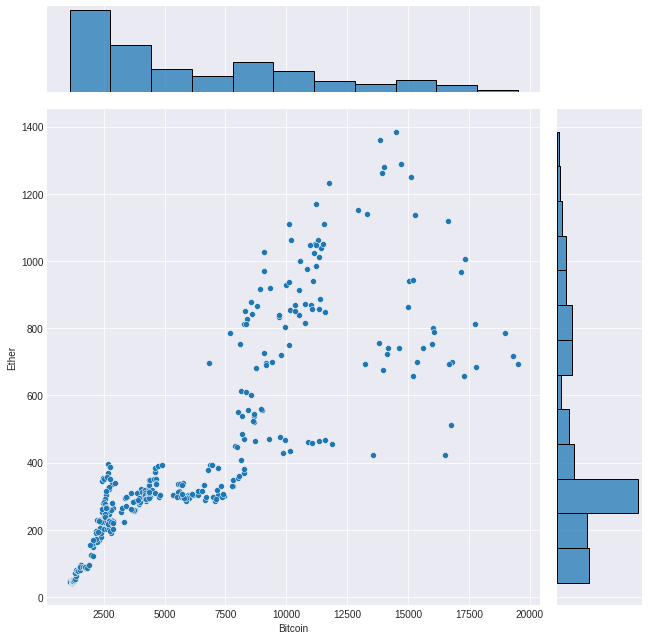

In [120]:
sns.jointplot(x='Bitcoin', y='Ether', data=df_cleaned, size=9)

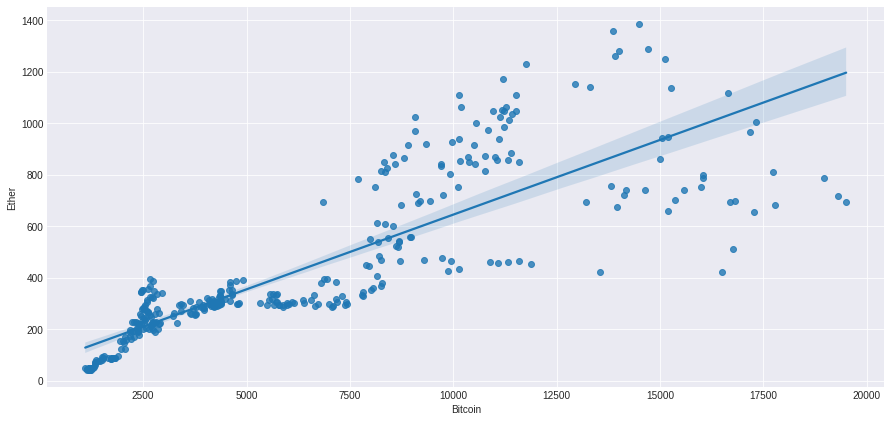

In [121]:
#to get the linear regreesion line
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='Bitcoin', y='Ether', data=df_cleaned, ax=ax)

In the code sns.regplot(x='Bitcoin', y='Ether', data=df_cleaned, ax=ax), the regplot() function from seaborn is used to create a scatter plot with a linear regression line.

The parameters passed to regplot() specify the data to be plotted and the axes on which to draw the plot. Specifically, the x and y parameters specify the columns of the df_cleaned DataFrame to be plotted on the x and y axes, respectively. The data parameter specifies the DataFrame that contains the data, and the ax parameter specifies the matplotlib axis object on which to draw the plot.

regplot() also calculates a linear regression line for the data, which is drawn on the plot by default. The regression line represents the best linear fit for the data, and provides a visual representation of the relationship between the two variables. Additionally, the function returns a matplotlib axis object that can be further customized with additional plotting functions.

In this specific example, the resulting plot will show a scatter plot of the 'Bitcoin' variable on the x-axis and the 'Ether' variable on the y-axis, with a linear regression line drawn through the data. The size of the resulting figure is specified by the figsize parameter in the plt.subplots() function call.






In [122]:
#QUANTILES, QUARTILES AND PERCENTILES

In [123]:
df_cleaned['Bitcoin'].quantile(.2)
# calculates the 20th percentile of the 'Bitcoin' 
#column of the df_cleaned DataFrame.

2438.8627342857144

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


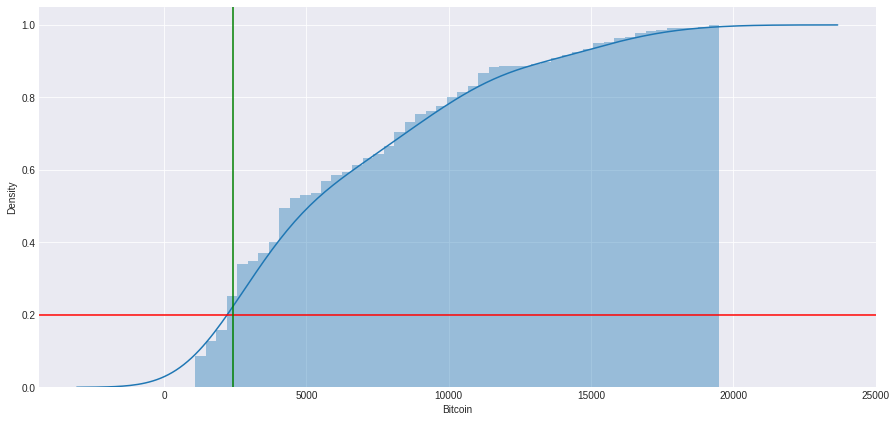

In [127]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='green')

Dispersion: Range, Variance and Standard Deviation (std) and IQR (Inter-quartile range)

In [128]:
#Range
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [129]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

In [130]:
#Variance
df_cleaned['Bitcoin'].var()

20374008.236050833

In [131]:
df_cleaned['Bitcoin'].std()

4513.757662530282

IQR
The Interquartile range is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [132]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [133]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [134]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


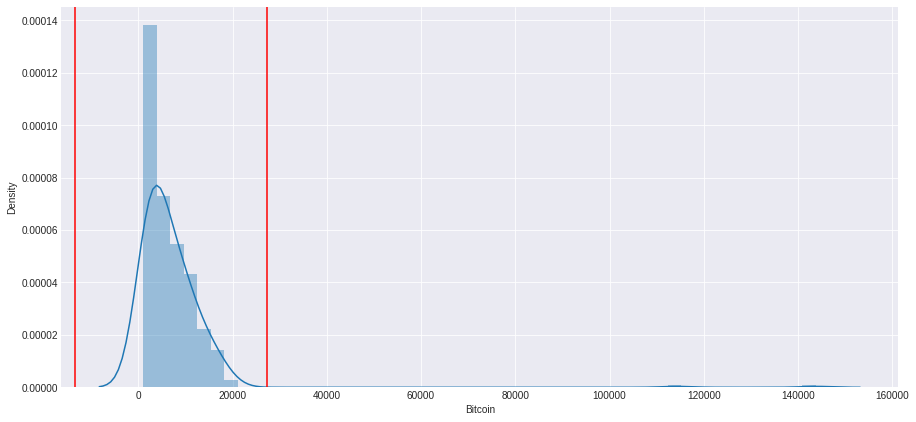

In [135]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [136]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [137]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [138]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


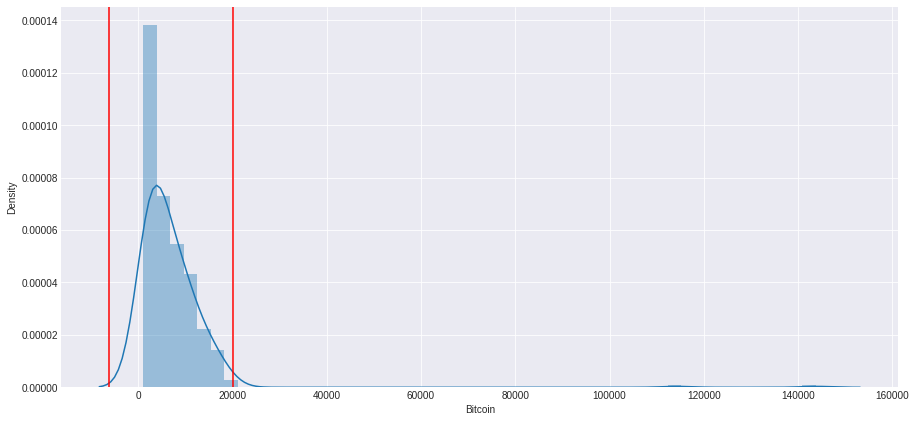

In [139]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [140]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

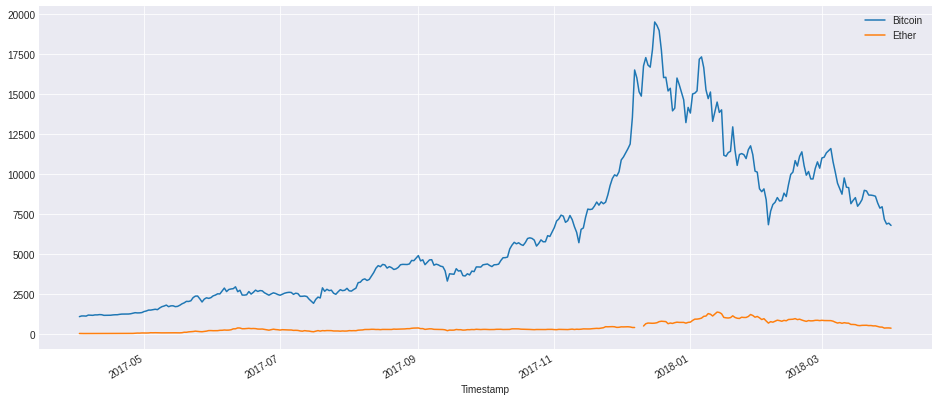

In [141]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

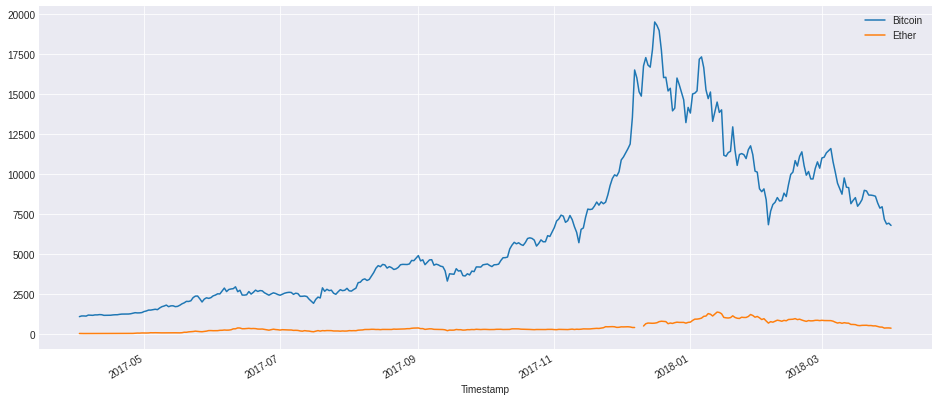

In [142]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))